In [1]:
## importing the iris dataset from sklearn
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
## Loading Iris data to a variable, type of iris is Bunch which is a object in the sklearn to represent data sets
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [3]:
## Features of Iris dataset -predictors, independent variables
## Print features of Iris dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### 150 Observations
#### Predictors, independent variables, features - 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)
#### Target , response ,dependent variable - Species
#### Classification problem - since the target is categorical

In [4]:
## Print target variables
print(iris.target) ## 0 - setosa, 1 - versicolor, 2 - virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
## Check the type of features and target varible
print(type(iris.data)) ## iris data nothing but csv but data is the extension
print(type(iris.target)) ## need to predict species of Iris
print(iris.data[1:6])
print(iris.target[1:6])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
[0 0 0 0 0]


In [7]:
print(iris.data.shape) ## 150 rows and 4 columns
print(iris.target.shape) ## 150, shape matches

(150, 4)
(150,)


In [8]:
## requirements for working with data in Scikit learn
## Predictors and Target variables should be numeric
## Predictors and Target variables should be separate objects
## Predictors and Target variables should be Numpy arrays and should have specific dimension
X = iris.data ## An array [ 4.9,3.1,1.3,0.2], X is capital because it represents Matrix
y = iris.target ## An array [ 0,1,2], since it takes only numeric values, the species is stored as numbers - 0 - Setosa,1-versicolor and 2 - Virginica
                ## y is lower because it specifies a vector

### K-nearest neighbors - KNN - Classifier

In [9]:
## importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
KNN = KNeighborsClassifier(n_neighbors=1) ## Returning an object of KNeighborsClassifier
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
## Fitting the model - Training the model
X = iris.data ## 2D array
y = iris.target ## 1D array
KNN.fit(X,y) ## this operation occurs INPLACE hence no need to assign to a variable

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
KNN.predict( [[3,3,4,0.8]] )

array([1])

In [13]:
## Predicting for multiple values - you can also split the data and predict the test data
KNN.predict([[2,3,3,1] , [3,5,3,2]])

array([1, 0])

In [14]:
## Training on the same data set when K = 1
y_pred_k1 = KNN.predict(X)
print(classification_report(y,y_pred_k1))
print(confusion_matrix(y,y_pred_k1)) ## Overfitting 100% accuracy

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [15]:
##Splitting the dataset when K = 1
X_train0,X_test0,y_train0,y_test0 = train_test_split(X,y,test_size=.3,random_state = 4)
KNN.fit(X_train0,y_train0)
y_predict3 = KNN.predict(X_test0)
print(classification_report(y_test0,y_predict3))
print(confusion_matrix(y_test0,y_predict3))
## You can clearly see overfitted model (K = 1,sample data accuracy = 100%), accuracy is 96% and accuracy of generalised model
## is 98%(when K = 5, accuracy of the sample data - 98%)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       0.90      0.90      0.90        10
          2       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        45

[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


In [16]:
## Tuning the model by tuning the hyper parameters to check for more value of K
## Lets try for K = 5 , ie No. of neighbors

In [17]:
knn_new = KNeighborsClassifier(n_neighbors = 5)
knn_new.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
x_new = [[2,3,3,1] , [3,5,3,2]]
knn_new.predict(x_new) ## This it predicted Setosa for both which might be little more accurate

array([0, 0])

In [19]:
##Testing on the same dataset by passing X to prediction model
y_pred1 = knn_new.predict(X)
print(classification_report(y , y_pred1))
print(confusion_matrix(y ,y_pred1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [20]:
#Splitting the data for training and testing - using the same data for testing and predictions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = .3 , random_state = 4)
knn_new1 = KNeighborsClassifier(n_neighbors=5)
knn_new1.fit(X,y)
y_predict1 = knn_new1.predict(X_test1)

In [21]:
print(classification_report(y_test1,y_predict1))
confusion_matrix(y_test1,y_predict1)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      0.90      0.95        10
          2       0.93      1.00      0.97        14

avg / total       0.98      0.98      0.98        45



array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

### Classification - Logistic Regression on the same IRIS dataset

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
model_LR = LogisticRegression()
model_LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
x_new = [[2,3,3,1] , [3,5,3,2]]
y_predict = model_LR.predict(x_new)
y_predict

array([2, 0])

#### Training on the same dataset

In [24]:
y_pred2 = model_LR.predict(X)
print(classification_report(y,y_pred2))
print(confusion_matrix(y,y_pred2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


#### Splitting the data for training and testing - using the same data for testing and predictions
### Train_test_split() - It shuffles the data first, splits according to the given parameter to Train and Test, so part of the sample actually won't go for training and these samples are sent to predict and test the prediction with Y_test.

In [25]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=.3,random_state = 15)

In [26]:
y_predict2 = model_LR.predict(X_test2)
y_predict2

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       2])

In [27]:
y_test2

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       2])

In [28]:
print("Accuracy score:", accuracy_score(y_test2,y_predict2))
print("r2 score:", r2_score(y_test2,y_predict2))
confusion_matrix(y_test2,y_predict2)

Accuracy score: 0.9777777777777777
r2 score: 0.9654907975460123


array([[15,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 13]], dtype=int64)

In [29]:
print(classification_report(y_test2,y_predict2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        16
          2       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45



### Conclusion - On sample dataset
### Logistic Regression - 98% with one incorrect predictions
###  KNN - 98 % with one incorrect prediction when K = 5
### Conclusion - On Full dataset
### Logistic Regression - 96% with 6 incorrect predictions
### KNN - 97% with 5 incorrect predictions K = 5
### KNN - 100% when K = 1, since we trained on entire sample data, it will predict correctly, hence splitting and testing is more useful to predict out of sample data. This we can also call as Overfitting, it makes model complex and might not work properly with out of sample data.
### When the model is overfitted, it learnt the noise in the data rather than the signal(out of sample)

In [30]:
## Looping through range to find the best K value
Range = range(1,26)
scores = []
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state = 4)
for K in Range:
    KNN_clf = KNeighborsClassifier(n_neighbors=K)
    KNN_clf.fit(X_train,y_train)
    predict = KNN_clf.predict(X_test)
    score=accuracy_score(y_test,predict)
    scores.append(score)
scores

[0.95,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9666666666666667,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95]

Text(0,0.5,'Accuary Score')

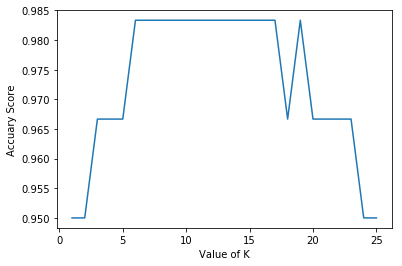

In [31]:
## Plotting graph against K and Accuracy
## %matplotlib inline - allows Plots to appear to appear within the notebook
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Range,scores)
plt.xlabel("Value of K")
plt.ylabel("Accuary Score")

### Drawbacks of train_test_split
### Too much variation in the testing accuracy when we change random_state value, means it takes different dataset each time, so to find the correct random_state value we can run a loop to find but thats what cross-validation does

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.cross_validation import train_test_split,KFold,cross_val_score

#### Cross validation

In [33]:
iris_new = load_iris()
X_N = iris_new.data
y_N = iris_new.target
print(X_N.shape)
print(y_N.shape)

(150, 4)
(150,)


In [34]:
iris_new.data[1:5]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [35]:
iris_new.target[1:5]

array([0, 0, 0, 0])

In [36]:
Xn_train,Xn_test,yn_train,yn_test = train_test_split(X_N,y_N,random_state = 4)
print(Xn_train.shape)
print(Xn_test.shape)
print(yn_train.shape)
print(yn_test.shape) 

(112, 4)
(38, 4)
(112,)
(38,)


In [37]:
new_model = KNeighborsClassifier(n_neighbors = 5)
new_model.fit(Xn_train,yn_train)
yn_predict = new_model.predict(Xn_test)
print(classification_report(yn_test,yn_predict))
confusion_matrix(yn_test,yn_predict)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       1.00      0.88      0.93         8
          2       0.92      1.00      0.96        12

avg / total       0.98      0.97      0.97        38



array([[18,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

In [38]:
new_model = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(new_model,X_N,y_N,cv=10,scoring='accuracy')
print(scores)
print("Mean=",scores.mean())
## Here we are running for n_neighbors = 5 which is not generalised
## We will create a for loop which iterates for each K value by the keeping the folds(cv) = 10.

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Mean= 0.9666666666666668


In [39]:
range_list = range(1,31)
accuracy_list = []
for k in range_list:
    new_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(new_model,X_N,y_N,cv=10,scoring='accuracy') ## cv = 10 is optimum
    accuracy_list.append(scores.mean())
accuracy_list

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

Text(0,0.5,'Cross- validation accuracy')

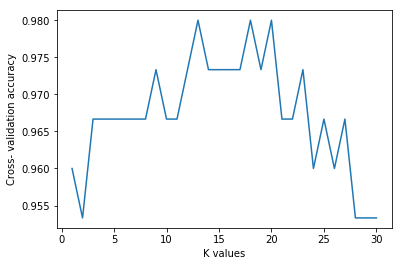

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range_list,accuracy_list) ## line Plot
plt.xlabel("K values")
plt.ylabel("Cross- validation accuracy")
## You can see Testing accuracy is high in K range 13 to 20

#### Comparing the KNN model (Best (K = 20) vs LogisticRegression)

In [50]:
## High value of K rewards low complexity models
##Comparing the KNN model (Best (K = 20) vs LogisticRegression)
Model_fin = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(Model_fin,X_N,y_N,cv=10,scoring='accuracy').mean())
Model_fin.fit(X_N,y_N)
Model_fin.predict([[4.7, 3.2, 1.3, 0.2]])

0.9800000000000001


array([0])

In [47]:
Model_fin_logr = LogisticRegression()
cross_val_score(Model_fin_logr,X_N,y_N,cv=10,scoring='accuracy').mean()

0.9533333333333334